# Data Wrangling with Pandas

So you have learned how to import data, clean it up and save as a csv. Time to get our hands dirty and start digging deep

## Starting out

Time to load in our clean data and take a look to make sure everything is as it should be. We're going to import a couple of new libraries in this lesson so we can visualise our data

In [66]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [67]:
df = pd.read_csv('/Users/karrie/Desktop/DATA TRAINING/CIJ 2017/clean_data.csv', parse_dates=['AcceptedDate'])
df.head()

,Unnamed: 0,RegulatedEntityName,AcceptedDate,DonorName_clean,DonorStatus,YEAR,Value,RegulatedEntityType,DonorId,CampaigningName
0,0,The Rt Hon David Mundell MP,2017-01-04,Kirklee Property Company (2) Ltd,Company,2017,2500.0,Regulated Donee,74251,NaN
1,1,UK Independence Party (UKIP),2017-03-31,Arromax Structures Ltd,Company,2017,2645.0,Political Party,68148,NaN
2,2,Liberal Democrats,2017-03-31,Rugby Lib Dem Council Group,Unincorporated Association,2017,2858.2,Political Party,43044,NaN
3,3,Liberal Democrats,2017-03-31,KIRLY LIMITED,Company,2017,20000.0,Political Party,77470,NaN
4,4,Liberal Democrats,2017-03-31,Dorset CC Lib Dem Council Group,Unincorporated Association,2017,3050.0,Political Party,50614,NaN


**Ah, we seem to have saved the index column from our previous dataframe. Let's delete this**

`del df['Unnamed: 0']`

In [68]:
del df['Unnamed: 0']
df.head()

,RegulatedEntityName,AcceptedDate,DonorName_clean,DonorStatus,YEAR,Value,RegulatedEntityType,DonorId,CampaigningName
0,The Rt Hon David Mundell MP,2017-01-04,Kirklee Property Company (2) Ltd,Company,2017,2500.0,Regulated Donee,74251,NaN
1,UK Independence Party (UKIP),2017-03-31,Arromax Structures Ltd,Company,2017,2645.0,Political Party,68148,NaN
2,Liberal Democrats,2017-03-31,Rugby Lib Dem Council Group,Unincorporated Association,2017,2858.2,Political Party,43044,NaN
3,Liberal Democrats,2017-03-31,KIRLY LIMITED,Company,2017,20000.0,Political Party,77470,NaN
4,Liberal Democrats,2017-03-31,Dorset CC Lib Dem Council Group,Unincorporated Association,2017,3050.0,Political Party,50614,NaN


**Ok let's check our data and make sure we have the correct data types and it's the right shape**

In [69]:
df.dtypes

RegulatedEntityName            object
AcceptedDate           datetime64[ns]
DonorName_clean                object
DonorStatus                    object
YEAR                          float64
Value                         float64
RegulatedEntityType            object
DonorId                       float64
CampaigningName                object
dtype: object

In [70]:
df.shape

(9151, 9)

## Counts, summing and percentage shares

**Let's see how many donations there are in total?**

`df['DonorName_clean'].count()`

In [71]:
df['DonorName_clean'].count()

9142

**Ok, let's see what the total value of donations is**

`df['Value'].sum()`

In [72]:
df['Value'].sum()

232497307.38999999

**Ok let's grab some basic descriptive stats and see what we've got**

`df.describe(include='all')`

In [73]:
df.describe(include='all')

,RegulatedEntityName,AcceptedDate,DonorName_clean,DonorStatus,YEAR,Value,RegulatedEntityType,DonorId,CampaigningName
count,9151,8463,9142,9151,8463.000000,9151.000000,9151,9144.000000,5
unique,224,752,3875,12,NaN,NaN,4,NaN,3
top,Conservative and Unionist Party,2015-03-30 00:00:00,Communication Workers Union CWU,Individual,NaN,NaN,Political Party,NaN,The In Crowd
freq,3224,245,178,4981,NaN,NaN,7521,NaN,2
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2015.463902,25406.765096,NaN,58251.375766,NaN
std,NaN,NaN,NaN,NaN,0.598857,110932.662550,NaN,16063.332250,NaN
min,NaN,NaN,NaN,NaN,2015.000000,50.000000,NaN,3.000000,NaN
25%,NaN,NaN,NaN,NaN,2015.000000,2000.000000,NaN,45481.500000,NaN


**Hmm let's see if any Donor gave more than once**

`df['DonorName_clean'].value_counts()`

In [74]:
df['DonorName_clean'].value_counts()

Communication Workers Union CWU                           178
Unite the Union                                           144
GMB                                                       121
UNISON                                                     96
Co-operative Party                                         77
Anthony Blair                                              72
House of Commons                                           71
Mr Paul Birch                                              69
United & Cecil Club                                        52
Union of Shop Distributive and Allied Workers              52
Lord David Sainsbury                                       50
THE JOSEPH ROWNTREE REFORM TRUST LIMITED                   50
Union of Construction, Allied Trades and Technicians       45
Community                                                  38
Transport Salaried Staffs Association                      30
Musicians Union                                            30
Union of

**Which entity/indidivual recieved the most?**

`df.groupby('RegulatedEntityName')['Value'].sum().sort_values(ascending=False)`

In [75]:
df.groupby('RegulatedEntityName')['Value'].sum().sort_values(ascending=False)

RegulatedEntityName
Conservative and Unionist Party         69049975.55
Labour Party                            59185813.55
The In Campaign Ltd                     24228109.10
Vote Leave Limited                      19631643.00
Liberal Democrats                       16220152.67
Leave.EU Group Ltd                       6400599.00
UK Independence Party (UKIP)             5481442.31
Scottish National Party (SNP)            3995819.99
Grassroots Out Ltd                       2611474.76
Co-operative Party                       2138625.00
Conservatives IN Ltd                     1798815.76
Mr Darren Grimes                         1350630.36
Brexit Express                           1256032.54
Green Party                              1149822.44
Owen Smith MP                             861905.12
Best For Our Future Ltd                   848000.00
Democracy Movement                        845614.52
We Are Europe                             685000.00
Progress Ltd                              56

**Let's see who has the largest share of the donations**

`total_donations = df['Value'].sum()`
`total_per_receiver = df.groupby('RegulatedEntityName')['Value'].sum().sort_values()`
`percentage_share = (total_per_receiver/total_donations)*100`

In [76]:
total_donations = df['Value'].sum()

In [77]:
total_per_receiver = df.groupby('RegulatedEntityName')['Value'].sum().sort_values()

In [78]:
percentage_share = (total_per_receiver/total_donations)*100

**Ok who got the most money? .head() will give us the least so let's use .tail() to see who got the most**

In [79]:
percentage_share.tail()

RegulatedEntityName
Liberal Democrats                   6.976491
Vote Leave Limited                  8.443815
The In Campaign Ltd                10.420813
Labour Party                       25.456559
Conservative and Unionist Party    29.699258
Name: Value, dtype: float64

## Digging deeper

**Let's see in which year the most amount of money was donated**

`df.groupby('YEAR')['Value'].sum()`

In [80]:
df.groupby('YEAR')['Value'].sum() 

YEAR
2015    81152684.82
2016    87205087.22
2017    12597040.53
Name: Value, dtype: float64

**Our data stretches from Jan 1 2015 before the 2015 election right up until April 2017. So let's investigate if more money was donated before or after Brexit. To do this we're going to create a new column with a boolean value**

`df['post_brexit'] = df['AcceptedDate'] <= '23/06/2016'`

In [104]:
df['post_brexit'] = df['AcceptedDate'] <= '23/06/2016'

**Now we're going to create a pivot table, summing the donations on whether they are before or after the brexit referendum***

`brexit_graph = df.groupby('post_brexit')['Value'].sum()`

In [105]:
brexit_graph = df.groupby('post_brexit')['Value'].sum()

**Time to plot our work**

`brexit_graph.plot(kind="bar")`

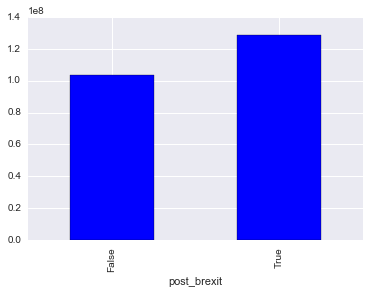

In [106]:
brexit_graph.plot(kind="bar")

**Which individual donated the most money?**

`individuals = df[df['DonorStatus'] == "individual"]`
`individuals.groupby('DonorName_clean')['Value'].sum().sort_values()`

In [22]:
individuals = df[df['DonorStatus'] == "Individual"]

In [23]:
individuals.shape

(4981, 9)

In [27]:
individuals.groupby('DonorName_clean')['Value'].sum().sort_values(ascending=False)

DonorName_clean
Lord David Sainsbury           7016514.00
Mr Peter Hargreaves            6400000.00
Mr David Sainsbury             2980734.00
David Sainsbury                2915734.00
Jeremy Hosking                 2172532.54
Diana Van Nievelt Price        2001000.00
Mr John Griffin                1958750.00
Mr Michael Davis               1729819.47
Mark Coombs                    1500000.00
Mr Crispin Odey                1296135.41
Mr John C Armitage             1200000.00
Gladys Bramall                 1200000.00
Mr Alexander  A Fraser         1170400.00
Mr Jeremy Hosking              1065500.00
Mr David Harding               1050000.00
Mr John E Gore                 1000050.00
Terence Adams                  1000000.00
Mr Gregory Nasmyth             1000000.00
David Harding                  1000000.00
Jonathan Wood                  1000000.00
Patrick Barbour                1000000.00
Mr Andrew Law                   974374.00
Mr David E D Brownlow           926014.00
Mr Ian R Taylor   

**Hmmm one of those names looks very similar to a former primeminister we all know, let's slice our data and see who he's been giving money to **

`blair = df[df['DonorName_clean'] == 'Anthony Blair']`

In [16]:
blair = df[df['DonorName_clean'] == 'Anthony Blair']
blair.head(30)

,RegulatedEntityName,AcceptedDate,DonorName_clean,DonorStatus,YEAR,Value,RegulatedEntityType,DonorId,CampaigningName
5382,Labour Party,25/05/2015,Anthony Blair,Individual,2015,1000,Political Party,67843,NaN
5428,Labour Party,18/05/2015,Anthony Blair,Individual,2015,1000,Political Party,67843,NaN
5578,Labour Party,06/05/2015,Anthony Blair,Individual,2015,1000,Political Party,67843,NaN
6042,Labour Party,14/04/2015,Anthony Blair,Individual,2015,2000,Political Party,67843,NaN
6078,Labour Party,13/04/2015,Anthony Blair,Individual,2015,1000,Political Party,67843,NaN
6119,Labour Party,10/04/2015,Anthony Blair,Individual,2015,1000,Political Party,67843,NaN
6142,Labour Party,09/04/2015,Anthony Blair,Individual,2015,1000,Political Party,67843,NaN
6143,Labour Party,09/04/2015,Anthony Blair,Individual,2015,1000,Political Party,67843,NaN
6250,Labour Party,03/04/2015,Anthony Blair,Individual,2015,1000,Political Party,67843,NaN
6270,Labour Party,02/04/2015,Anthony Blair,Individual,2015,1000,Political Party,67843,NaN


In [100]:
df.groupby(['DonorStatus', 'YEAR'])['Value'].sum().unstack().sort_values(2015).head(10)

YEAR,2015.0,2016.0,2017.0
DonorStatus,,,
Registered Political Party,151892.00,46841.00,5000.00
Other,164799.00,887115.18,48840.00
Trust,202273.11,45721.90,39953.14
Limited Liability Partnership,373446.44,490136.48,63372.00
Friendly Society,930388.00,905252.00,322800.00
Unincorporated Association,2945002.39,2752963.74,485066.51
Public Fund,9754241.44,11481026.31,2712926.83
Company,15608416.27,15049082.09,2670170.75
Trade Union,15667954.23,9509088.80,1964500.69


In [101]:
most = df.groupby(['DonorStatus', 'YEAR'])['Value'].sum().unstack().sort_values(2015).head(10)

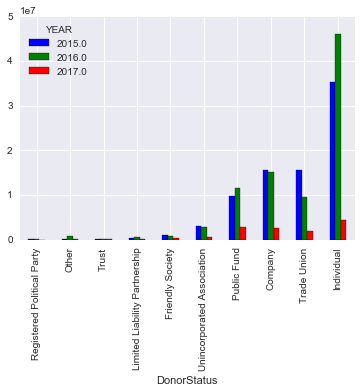

In [102]:
most.plot(kind="bar")


## Wrapping up

**Ok that's all folks!**

Today you got a small taste of what is possible with Pandas, if you want to learn more then check out some of the links below

* dataquest.io - https://www.dataquest.io/blog/pandas-python-tutorial/
* 10 minutes to pandas - http://pandas.pydata.org/pandas-docs/stable/10min.html
* 19 essential snippets in pandas - https://jeffdelaney.me/blog/useful-snippets-in-pandas/